# Analysis of effects of code cleaning

In [223]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

In [224]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import pandas as pd

# plot style
sns.set_style('whitegrid')
sns.set_style({'font.family': 'Times New Roman'})

# Load data

In [225]:
df_32_noenv = pd.read_csv("data/one-hour-run-data/run_log_r32_no_env.csv", sep="\t", names=["doi", "file", "result"])
df_32_env = pd.read_csv("data/one-hour-run-data/run_log_r32_env.csv", sep="\t", names=["doi", "file", "result"])
df_36_noenv = pd.read_csv("data/one-hour-run-data/run_log_r36_no_env.csv", sep="\t", names=["doi", "file", "result"])
df_36_env = pd.read_csv("data/one-hour-run-data/run_log_r36_env.csv", sep="\t", names=["doi", "file", "result"])
df_40_noenv = pd.read_csv("data/one-hour-run-data/run_log_r40_no_env.csv", sep="\t", names=["doi", "file", "result"])
df_40_env = pd.read_csv("data/one-hour-run-data/run_log_r40_env.csv", sep="\t", names=["doi", "file", "result"])

## Merging before and after datasets

In [226]:
df_36 = pd.merge(df_36_noenv, df_36_env,on=['doi','file'], how='inner')

In [227]:
df_32 = pd.merge(df_32_noenv, df_32_env,on=['doi','file'], how='inner')

In [228]:
df_40 = pd.merge(df_40_noenv, df_40_env,on=['doi','file'], how='inner')

## Remove NAN

In [229]:
df_36.result_y.isna().sum()

0

In [230]:
df_40.result_y.isna().sum()

0

In [231]:
df_32= df_32.drop(
    df_32[(df_32.result_x == 'time limit exceeded') | (df_32.result_y == 'time limit exceeded')].index)

In [232]:
df_36= df_36.drop(
    df_36[(df_36.result_x == 'time limit exceeded') | (df_36.result_y == 'time limit exceeded')].index)

In [233]:
df_40= df_40.drop(
    df_40[(df_40.result_x == 'time limit exceeded') | (df_40.result_y == 'time limit exceeded')].index)

## Count success

In [234]:
def success(el):
    if "success" in el:
        return 1
    return 0

df_32['before']=df_32["result_x"].apply(success)
df_32['after']=df_32["result_y"].apply(success)
df_36['before']=df_36["result_x"].apply(success)
df_36['after']=df_36["result_y"].apply(success)
df_40['before']=df_40["result_x"].apply(success)
df_40['after']=df_40["result_y"].apply(success)

## Temp table

In [235]:
bars1 = [
    df_32.before.sum()*100./len(df_32),
    df_36.before.sum()*100./len(df_36),
    df_40.before.sum()*100./len(df_40)
]
bars1

[12.709251101321586, 16.424822476072862, 14.843188891548959]

In [236]:
bars2 = [
    df_32.after.sum()*100./len(df_32),
    df_36.after.sum()*100./len(df_36),
    df_40.after.sum()*100./len(df_40)
]
bars2

[18.303964757709252, 24.51373880827416, 22.59995211874551]

## Plotting

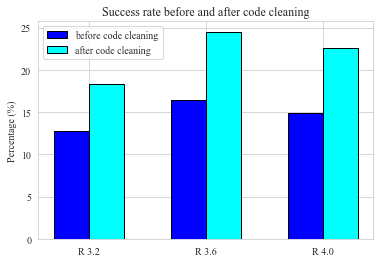

In [237]:
barWidth = 0.3

# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='before code cleaning')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', capsize=7, label='after code cleaning')
 
# general layout
plt.title("Success rate before and after code cleaning")
plt.xticks([r + barWidth/2 for r in range(len(bars1))], ['R 3.2', 'R 3.6', 'R 4.0'])
plt.ylabel('Percentage (%)')
plt.legend()
 
# Show graphic
plt.savefig('plots/before_after_code_cleaning.png', bbox_inches = "tight")
plt.show()

# Aggregate results from these

In [272]:
temp = pd.merge(df_32, df_36, on=['doi','file'])
temp = pd.merge(temp, df_40, on=['doi','file'])
len(temp)

1781

In [273]:
temp['before_ag'] = temp[['before_x','before_y','before']].max(axis=1)
temp['after_ag'] = temp[['after_x','after_y','after']].max(axis=1)

In [274]:
sum(temp['before_ag'])

359

In [275]:
sum(temp['after_ag'])

491

# Before and after code cleaning for aggregate results

In [238]:
df1 = pd.read_csv("aggregate_results_env.csv", index_col=0)
len(df1)

7414

In [239]:
df2 = pd.read_csv("aggregate_results_no_env.csv", index_col=0)
len(df2)

7659

In [240]:
df2.head()

,doi,file,r32,r36,r40,result
0,doi:10.7910/DVN/XFQZI2,Condemnation.R,Error in library(readstata13) : there is no pa...,NaN,NaN,NaN
1,doi:10.7910/DVN/WGPDBS,Replication_of_Figures.R,success,success,success,success
2,doi:10.7910/DVN/BPON3K,fig_10_effect_of_winning_on_gov.R,Error in library(gridExtra) : there is no pack...,NaN,Error in library(gridExtra) : there is no pack...,NaN
3,doi:10.7910/DVN/BPON3K,fig_11_rd_placebo.R,Error in library(gridExtra) : there is no pack...,NaN,Error in library(gridExtra) : there is no pack...,NaN
4,doi:10.7910/DVN/BPON3K,fig_12_historical_trend.R,Error in library(ggthemes) : there is no packa...,NaN,Error in library(ggthemes) : there is no packa...,NaN


In [241]:
df_merged = pd.merge(df1, df2,on=['doi','file'], how='inner')

In [242]:
len(df_merged)

6464

In [243]:
df_merged.head()

,doi,file,r32_x,r36_x,r40_x,result_x,success,r32_y,r36_y,r40_y,result_y
0,doi:10.7910/DVN/XFQZI2,Condemnation.R,"Error in eval(expr, envir, enclos) : could not...",Error in read.dta13('Condemnation.dta') : co...,NaN,NaN,NaN,Error in library(readstata13) : there is no pa...,NaN,NaN,NaN
1,doi:10.7910/DVN/WGPDBS,Replication_of_Figures.R,success,success,success,success,1.0,success,success,success,success
2,doi:10.7910/DVN/BPON3K,fig_10_effect_of_winning_on_gov.R,"Error in diag(vcovHC(DMareg, type = 'HC3')) : ...","Error in vcovHC(DMareg, type = 'HC3') : could ...","Error in vcovHC(DMareg, type = 'HC3') : could ...","Error in vcovHC(DMareg, type = 'HC3') : could ...",0.0,Error in library(gridExtra) : there is no pack...,NaN,Error in library(gridExtra) : there is no pack...,NaN
3,doi:10.7910/DVN/BPON3K,fig_11_rd_placebo.R,"Error in ggsave('placebo.pdf', plot = placebo,...",success,success,success,1.0,Error in library(gridExtra) : there is no pack...,NaN,Error in library(gridExtra) : there is no pack...,NaN
4,doi:10.7910/DVN/BPON3K,fig_12_historical_trend.R,"Error in ggsave('historical_trend.pdf', plot =...",success,success,success,1.0,Error in library(ggthemes) : there is no packa...,NaN,Error in library(ggthemes) : there is no packa...,NaN


In [244]:
df_merged= df_merged.drop(
    df_merged[(df_merged.result_x == 'time limit exceeded') | (df_merged.result_y == 'time limit exceeded')].index)

In [245]:
df_merged= df_merged.drop(
    df_merged[(df_merged.result_x.isna()) | (df_merged.result_y.isna())].index)

In [246]:
len(df_merged)

2335

In [247]:
bars1 = [
    df_32.before.sum()*100./len(df_32),
    df_36.before.sum()*100./len(df_36),
    df_40.before.sum()*100./len(df_40),
    (df_merged['result_y'] == 'success').sum()*100./len(df_merged)
]
bars1

[12.709251101321586,
 16.424822476072862,
 14.843188891548959,
 36.102783725910065]

In [248]:
bars2 = [
    df_32.after.sum()*100./len(df_32),
    df_36.after.sum()*100./len(df_36),
    df_40.after.sum()*100./len(df_40),
    (df_merged['result_x'] == 'success').sum()*100./len(df_merged)
]
bars2

[18.303964757709252, 24.51373880827416, 22.59995211874551, 46.980728051391864]

In [249]:
totals = [len(df_32), len(df_36), len(df_40), len(df_merged)]

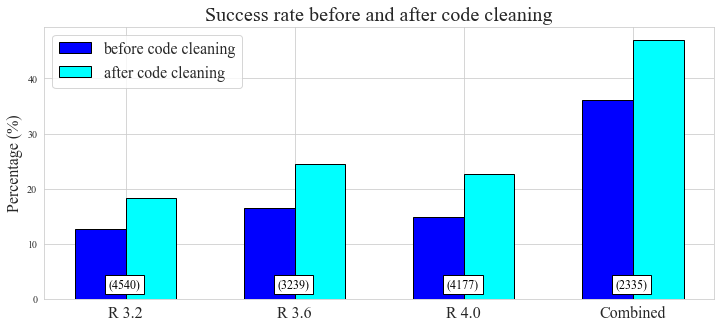

In [250]:
barWidth = 0.3

plt.figure(figsize=(12,5))

# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='before code cleaning')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', capsize=7, label='after code cleaning')

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=1)
for i in range(len(totals)):
    plt.annotate("("+str(int(totals[i]))+")", xy=(i+0.05, 2), bbox=bbox_props, rotation=0, color="black", size=12)

# general layout
plt.title("Success rate before and after code cleaning", fontsize=20)
plt.xticks([r + barWidth/2 for r in range(len(bars1))], ['R 3.2', 'R 3.6', 'R 4.0', 'Combined'], fontsize=16)
plt.ylabel('Percentage (%)', fontsize=16)
plt.legend(fontsize=16)
 
# Show graphic
plt.savefig('plots/before_after_code_cleaning2.png', bbox_inches = "tight")
plt.show()